In [20]:
from math import sqrt
from numpy import mean, std
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv('evosuite-report/statistics.csv')


In [22]:
df

,configuration_id,TARGET_CLASS,criterion,Size,Length,MutationScore
0,Branch,com.sonos.services._1_1.Sonos,BRANCH,6,16,1.000000
1,Branch,com.sonos.services._1_1.CustomFault,BRANCH,4,8,1.000000
2,Branch,com.sonos.services._1.ReorderContainer,BRANCH,8,16,0.272727
3,Branch,com.sonos.services._1.ActionType,BRANCH,3,4,0.615385
4,Branch,com.sonos.services._1.AppLinkInfo,BRANCH,12,24,0.000000
...,...,...,...,...,...,...
363,Default,org.subsonic.restapi.ChatMessages,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,2,9,1.000000
364,Default,org.subsonic.restapi.JukeboxPlaylist,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,2,9,1.000000
365,Default,org.subsonic.restapi.Artist,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,16,48,0.888889
366,Default,org.subsonic.restapi.SimilarSongs2,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,2,9,1.000000


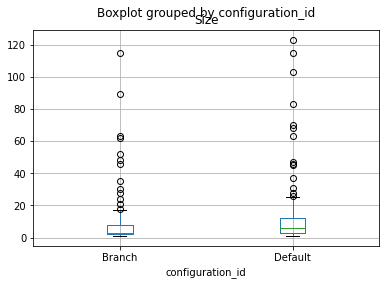

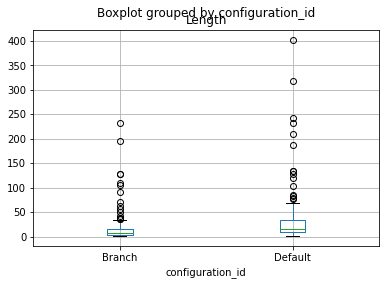

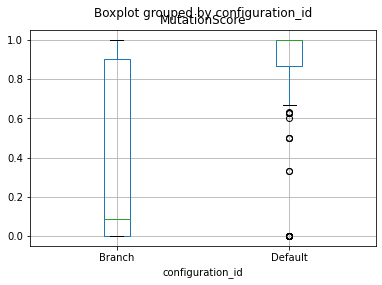

In [23]:
bp = df.boxplot(column='Size', by='configuration_id')
bp = df.boxplot(column='Length', by='configuration_id')
bp = df.boxplot(column='MutationScore', by='configuration_id')
plt.show()

In [24]:
def cohen_d(x, y):
    return (mean(x) - mean(y)) / sqrt((std(x, ddof=1)**2 + std(y, ddof=1)**2) / 2.0)


cat1 = df[df['configuration_id'] == 'Default']
cat2 = df[df['configuration_id'] == 'Branch']

for column in ['Size', 'Length', 'MutationScore']:
    print("%s: %.2f (%f)" % (column, cohen_d(
        cat1[column], cat2[column]), wilcoxon(cat1[column], cat2[column]).pvalue))


Size: 0.22 (0.000000)
Length: 0.39 (0.000000)
MutationScore: 1.43 (0.000000)


In [25]:
df2 = pd.read_csv('evosuite-report/statistics_default.csv')

In [26]:
df2

,TARGET_CLASS,criterion,Coverage,Total_Goals,Covered_Goals
0,org.airsonic.player.io.PlayQueueInputStream,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.692819,254,144
1,org.airsonic.player.io.ShoutCastOutputStream,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.762413,291,185
2,org.airsonic.player.io.RangeOutputStream,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,1.000000,210,210
3,org.airsonic.player.io.TranscodeInputStream,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.213636,96,16
4,org.airsonic.player.io.InputStreamReaderThread,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.923077,59,51
...,...,...,...,...,...
270,org.subsonic.restapi.ChatMessages,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.937500,21,18
271,org.subsonic.restapi.JukeboxPlaylist,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.937500,21,18
272,org.subsonic.restapi.Artist,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.978611,119,115
273,org.subsonic.restapi.SimilarSongs2,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.937500,21,18


In [27]:
print(df2['Coverage'].mean())

0.9465875224573227
